# Exploratory Data Analysis
## Team 01 DSCI-522 
## Group Project: Credit_Approval_Prediction

## Data
Data used for this project comes from UC Irvine's Machine Learning Repository https://archive-beta.ics.uci.edu/dataset/27/credit+approval
The dataset contains data on Japanese Credit Card screeing for credit card applications where all attribute names and values have been anonymized in order to protect the confidentiality of the applicants.  Features contained in the dataset include continuous features and categorical features named A1-A16.  The target feature is A16 containing values `+` or `-` indicating wheather the candidate was approved or not.  The feature names and properties have been anonymized to protect customer privacy.

## Summary of Exploratory data analysis

The data set contains 16 columns with 690 observations each.  So the data set is not huge, but of decent size and should be able to produce good insights with the intended modeling.

After an initial look at the data, we identified missing values which were denoted by `?`.  We decided to replace these with `np.nan`, in order to properly categorize the columns and facilitate calculations in the process of modeling the data.

The data has been split in two parts - `train_df` and `test_df`. We will perform all EDA and subsequent modeling on train_df and use test_df to verify the robustness of our selected best model.

There is are 10 categorical features, namely `A1`, `A4`, `A5`, `A6`, `A7`, `A9`, `A10`, `A12`, `A13`, `A16` - the last being the target column.  In the EDA we evaluate the levels and number of occurrences of each categorical feature.  The data contains 6 numeric features, namely `A2`, `A3`, `A8`, `A11`, `A14`, `A15`.  In the EDA we evaluate the frequencies in 15 separate value bins for the numeric features.

Finally we evaluate a correlation matrix with the numeric features Spearman correlations to evaluate any potential pitfalls from highly correlated features which could end up misguiding our modeling efforts.

**First we import the needed libraries**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

**Read in data**
We are creating a dataframe with the data and looking at the top few rows in order to get an initial feel for what the data looks like.  

In [2]:
df = pd.read_csv("../data/raw/crx.csv", encoding="utf-8")

With df.shape we can see that there are 690 observations of the 16 features in the dataset.  So this is not a very big dataset.

In [3]:
df.shape

(690, 16)

**Splitting the data**

Before exploring the data we create Train and Test splits with 20% of the data used as test data and 80% used as training data.

In [4]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=522)

Next we take an initial high-level look at the features in the training data.

In [5]:
train_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
146,b,23.25,1.50,u,g,q,v,2.375,t,t,3,t,g,0,582,+
237,b,21.33,7.50,u,g,aa,v,1.415,t,t,1,f,g,80,9800,+
261,a,52.17,0.00,y,p,ff,ff,0.000,f,f,0,f,g,0,0,-
27,b,56.58,18.50,u,g,d,bb,15.000,t,t,17,t,g,0,0,+
497,b,20.17,9.25,u,g,c,v,1.665,t,t,3,t,g,40,28,+


We take an initial evaluation of the different columns in the training data by running `train_df.info()` below. Comparing the results in Table 1 with the the output of `train_df.head()` we noticed that columns `A2` and `A14` appear to be numeric features, while df.info() returns `object` Dtype for them.  This is explained by the fact that the missing values in the data are replaced with `?`.  Because none the remaining numeric columns are interpreted correctly as float64 Dtypes, we will need to convert `A2` and `A14` to float64 manually in order to facilitate the modeling.  The missing values do not affect the categorical columns which are appropriately labeled as Dtype object.

In [6]:
print('\033[1m'+ "Table 1: Initial summary information about training data \n"+'\033[0m')

train_df.info()

Table 1: Initial summary information about training data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 146 to 288
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      552 non-null    object 
 1   A2      552 non-null    object 
 2   A3      552 non-null    float64
 3   A4      552 non-null    object 
 4   A5      552 non-null    object 
 5   A6      552 non-null    object 
 6   A7      552 non-null    object 
 7   A8      552 non-null    float64
 8   A9      552 non-null    object 
 9   A10     552 non-null    object 
 10  A11     552 non-null    int64  
 11  A12     552 non-null    object 
 12  A13     552 non-null    object 
 13  A14     552 non-null    object 
 14  A15     552 non-null    int64  
 15  A16     552 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 73.3+ KB


**Replace ? with np.nan**

In order to gain better understanding of the missing values, we are replacing the `?` in place of missing values with np.nan.

In [7]:
train_df = train_df.replace('?', np.nan)

**Convert columns A2 and A14 to float**

As mentioned above we can convert these two mislabeled columns as type `float` in order to better model their contents.

In [8]:
train_df[['A2', 'A14']] = train_df[['A2', 'A14']] .astype(float)

After conversion of `A2` and `A14` to float `train_df.info()`  displays all column values properly.

In [9]:
print('\033[1m'+ "Table 2: Summary information about training data \n"+'\033[0m')

train_df.info()

Table 2: Summary information about training data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 146 to 288
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      544 non-null    object 
 1   A2      542 non-null    float64
 2   A3      552 non-null    float64
 3   A4      549 non-null    object 
 4   A5      549 non-null    object 
 5   A6      546 non-null    object 
 6   A7      546 non-null    object 
 7   A8      552 non-null    float64
 8   A9      552 non-null    object 
 9   A10     552 non-null    object 
 10  A11     552 non-null    int64  
 11  A12     552 non-null    object 
 12  A13     552 non-null    object 
 13  A14     544 non-null    float64
 14  A15     552 non-null    int64  
 15  A16     552 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 73.3+ KB


Next we run a summary of the missing values, in order to prepare a strategy for dealing with them during the modeling part.

In [10]:
print('\033[1m'+ "Table 3: Summary missing values per column in training dataframe \n"+'\033[0m')

train_df.isnull().sum()

Table 3: Summary missing values per column in training dataframe 



A1      8
A2     10
A3      0
A4      3
A5      3
A6      6
A7      6
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     8
A15     0
A16     0
dtype: int64

We can see in the description of the numeric columns in Table 4, that the values have different degree of variance and min-max values, which will require us to scale the numeric values in the modeling phase of our analysis.

In [11]:
print('\033[1m'+ "Table 4: Summary of key statistical categories of numeric columns in training data \n"+'\033[0m')

train_df.describe()

Table 4: Summary of key statistical categories of numeric columns in training data 



,A2,A3,A8,A11,A14,A15
count,542.000000,552.000000,552.000000,552.000000,544.000000,552.000000
mean,31.210406,4.752745,2.211476,2.472826,182.981618,975.422101
std,11.938560,4.888587,3.329894,5.074328,166.134660,5553.903078
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.420000,1.040000,0.165000,0.000000,80.000000,0.000000
50%,27.670000,2.812500,1.000000,0.000000,160.000000,4.000000
75%,37.750000,7.155000,2.595000,3.000000,272.500000,369.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


**Take a look at individual columns of the dataset**

In order to better understand what the data contains we want to look at the individual columns separately.  We'll first look at the values distribution for the categorical columns.

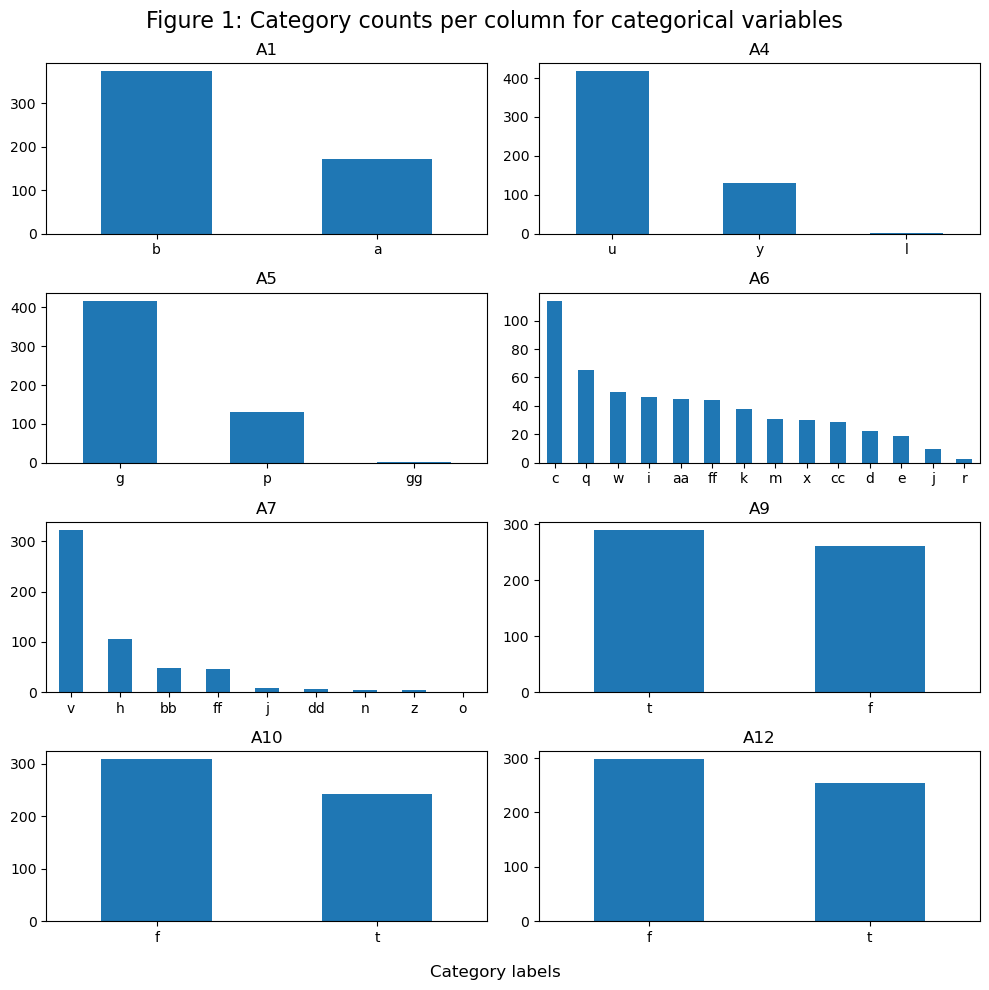

In [12]:
categorical = ["A1", "A4","A5","A6","A7","A9","A10","A12"]

fig = plt.figure(figsize=(10, 10))

for i, col in enumerate(categorical):
    fig.add_subplot(4, 2, i + 1)
    train_df[col].value_counts().plot(kind="bar", ax=plt.gca(), title=col, rot=0)


fig.supxlabel('Category labels')
fig.suptitle('Figure 1: Category counts per column for categorical variables', fontsize=16)
fig.tight_layout()

We also want to get a better understanding of the value distributions in the numeric columns by creating histograms with each of the values in the numeric columns.

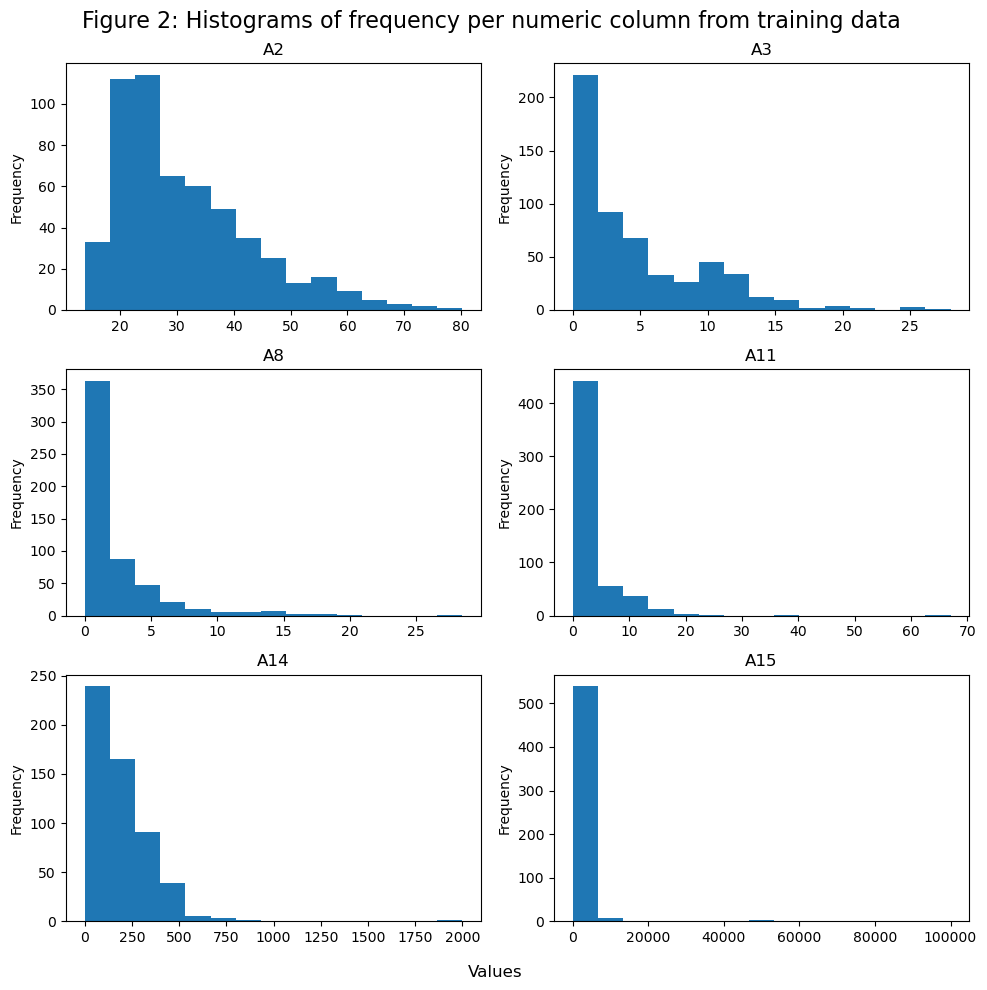

In [13]:
numeric = ["A2", "A3","A8","A11","A14","A15"]

fig = plt.figure(figsize=(10, 10))


for i, col in enumerate(numeric):
    fig.add_subplot(3, 2, i + 1)
    train_df[col].plot(kind="hist", ax=plt.gca(), title=col, rot=0, bins = 15)
fig.suptitle('Figure 2: Histograms of frequency per numeric column from training data ', fontsize=16)
fig.supxlabel('Values')
fig.tight_layout()

**Correlation matrix**

Finally we want to look at the correlations among the numeric values.  We can see that there are no major outliers in terms of correlations.  This is a good sign, because it means that all the numeric features can potentially add value in the analysis.

In [14]:
print('\033[1m'+ "Table 5: Correlation matrix of numeric columns from training data \n"+'\033[0m')

corr = train_df.corr('spearman').style.background_gradient()
corr

Table 5: Correlation matrix of numeric columns from training data 



,A2,A3,A8,A11,A14,A15
A2,1.000000,0.093543,0.267358,0.115275,0.019440,0.037763
A3,0.093543,1.000000,0.261431,0.190279,-0.285688,0.109634
A8,0.267358,0.261431,1.000000,0.334260,-0.034651,0.092097
A11,0.115275,0.190279,0.334260,1.000000,-0.117220,0.424329
A14,0.019440,-0.285688,-0.034651,-0.117220,1.000000,-0.045223
A15,0.037763,0.109634,0.092097,0.424329,-0.045223,1.000000
